In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crowdedness-at-the-campus-gym/data.csv


In [2]:
df = pd.read_csv("/kaggle/input/crowdedness-at-the-campus-gym/data.csv")

# Data Understanding

In [3]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.shape

(62184, 11)

In [5]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [6]:
df.nunique()

number_people             128
date                    62184
timestamp               31321
day_of_week                 7
is_weekend                  2
is_holiday                  2
temperature              2599
is_start_of_semester        2
is_during_semester          2
month                      12
hour                       24
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [8]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [9]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [10]:
df["date"] = pd.to_datetime(df["date"] , utc = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   number_people         62184 non-null  int64              
 1   date                  62184 non-null  datetime64[ns, UTC]
 2   timestamp             62184 non-null  int64              
 3   day_of_week           62184 non-null  int64              
 4   is_weekend            62184 non-null  int64              
 5   is_holiday            62184 non-null  int64              
 6   temperature           62184 non-null  float64            
 7   is_start_of_semester  62184 non-null  int64              
 8   is_during_semester    62184 non-null  int64              
 9   month                 62184 non-null  int64              
 10  hour                  62184 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(9)
memory usage: 5.2 M

In [12]:
df["date"]

0       2015-08-15 00:00:11+00:00
1       2015-08-15 00:20:14+00:00
2       2015-08-15 00:30:15+00:00
3       2015-08-15 00:40:16+00:00
4       2015-08-15 00:50:17+00:00
                   ...           
62179   2017-03-19 01:42:28+00:00
62180   2017-03-19 01:52:35+00:00
62181   2017-03-19 02:02:40+00:00
62182   2017-03-19 02:12:47+00:00
62183   2017-03-19 02:22:51+00:00
Name: date, Length: 62184, dtype: datetime64[ns, UTC]

In [13]:
df["date"].dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
62179    2017
62180    2017
62181    2017
62182    2017
62183    2017
Name: date, Length: 62184, dtype: int32

In [14]:
df["date"].dt.month

0        8
1        8
2        8
3        8
4        8
        ..
62179    3
62180    3
62181    3
62182    3
62183    3
Name: date, Length: 62184, dtype: int32

In [15]:
df["date"].dt.day

0        15
1        15
2        15
3        15
4        15
         ..
62179    19
62180    19
62181    19
62182    19
62183    19
Name: date, Length: 62184, dtype: int32

In [16]:
df["year"] = df["date"].dt.year

In [17]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17,2015
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17,2015
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17,2015
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17,2015
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17,2015


In [18]:
df["year"].unique()

array([2015, 2016, 2017], dtype=int32)

In [19]:
df.drop("date" , axis = 1 , inplace = True)

In [20]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,61211,4,0,0,71.76,0,0,8,17,2015
1,45,62414,4,0,0,71.76,0,0,8,17,2015
2,40,63015,4,0,0,71.76,0,0,8,17,2015
3,44,63616,4,0,0,71.76,0,0,8,17,2015
4,45,64217,4,0,0,71.76,0,0,8,17,2015


In [21]:
df.tail()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
62179,23,67348,5,1,0,61.07,0,1,3,18,2017
62180,21,67955,5,1,0,61.07,0,1,3,18,2017
62181,25,68560,5,1,0,56.71,0,1,3,19,2017
62182,18,69167,5,1,0,56.71,0,1,3,19,2017
62183,23,69771,5,1,0,56.71,0,1,3,19,2017


# EDA (Keşifçi Veri Analizi) 

In [22]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


**1. HEDEF DEĞİŞKEN DAĞILIMI (Kişi Sayısı Ne Durumda?)**

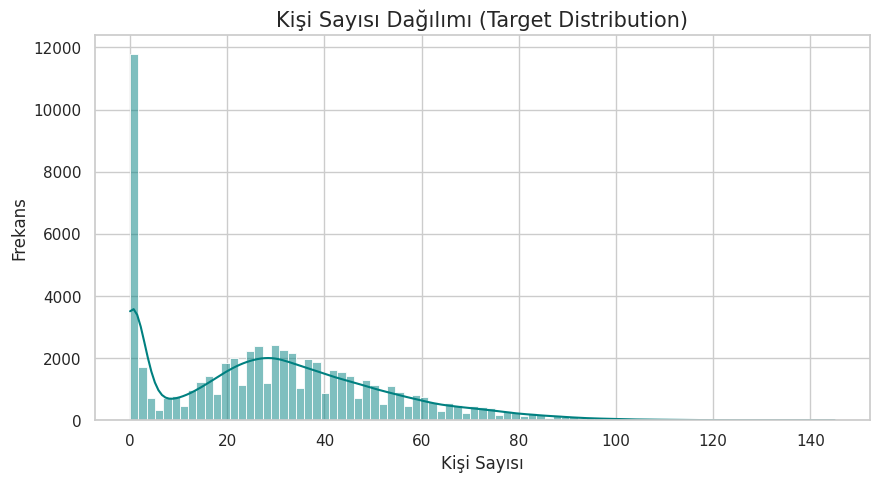

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df['number_people'], kde=True, color='teal')
plt.title('Kişi Sayısı Dağılımı (Target Distribution)', fontsize=15)
plt.xlabel('Kişi Sayısı')
plt.ylabel('Frekans')
plt.show()

**2. KORELASYON ISI HARİTASI (Hangi Değişkenler İlişkili?)**

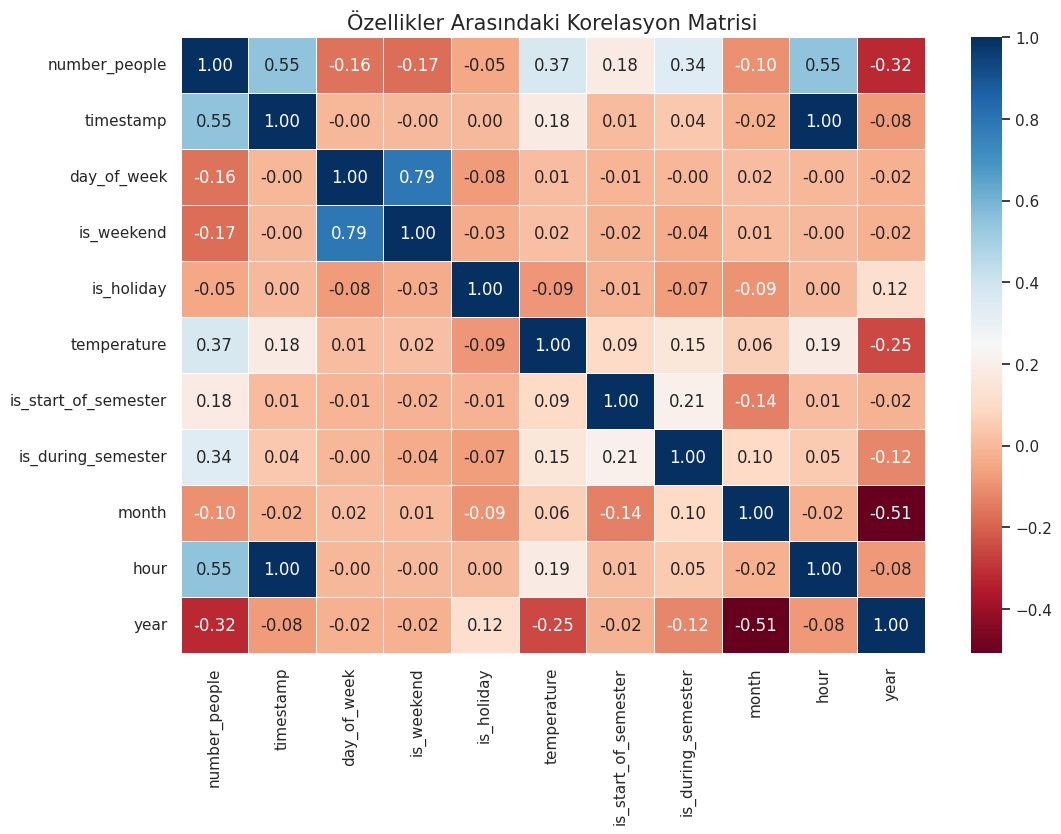

In [24]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Matrisi', fontsize=15)
plt.show()

**3. SAATLİK TREND ANALİZİ (Günün En Yoğun Saatleri)**

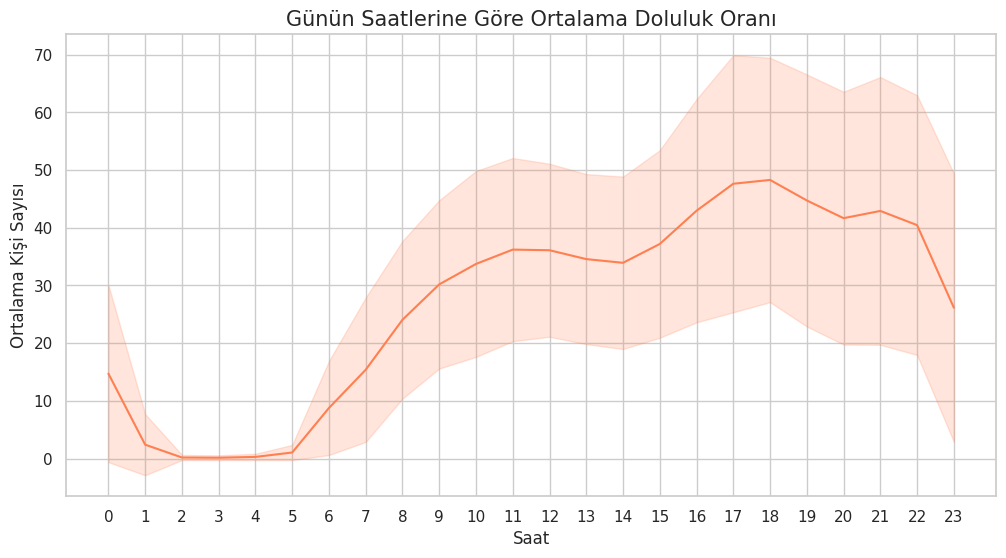

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='number_people', data=df, ci='sd', color='coral')
plt.title('Günün Saatlerine Göre Ortalama Doluluk Oranı', fontsize=15)
plt.xlabel('Saat')
plt.ylabel('Ortalama Kişi Sayısı')
plt.xticks(range(0, 24))
plt.show()

**4. HAFTALIK VE DÖNEMSEL KARŞILAŞTIRMA (Kutulu Grafikler)**

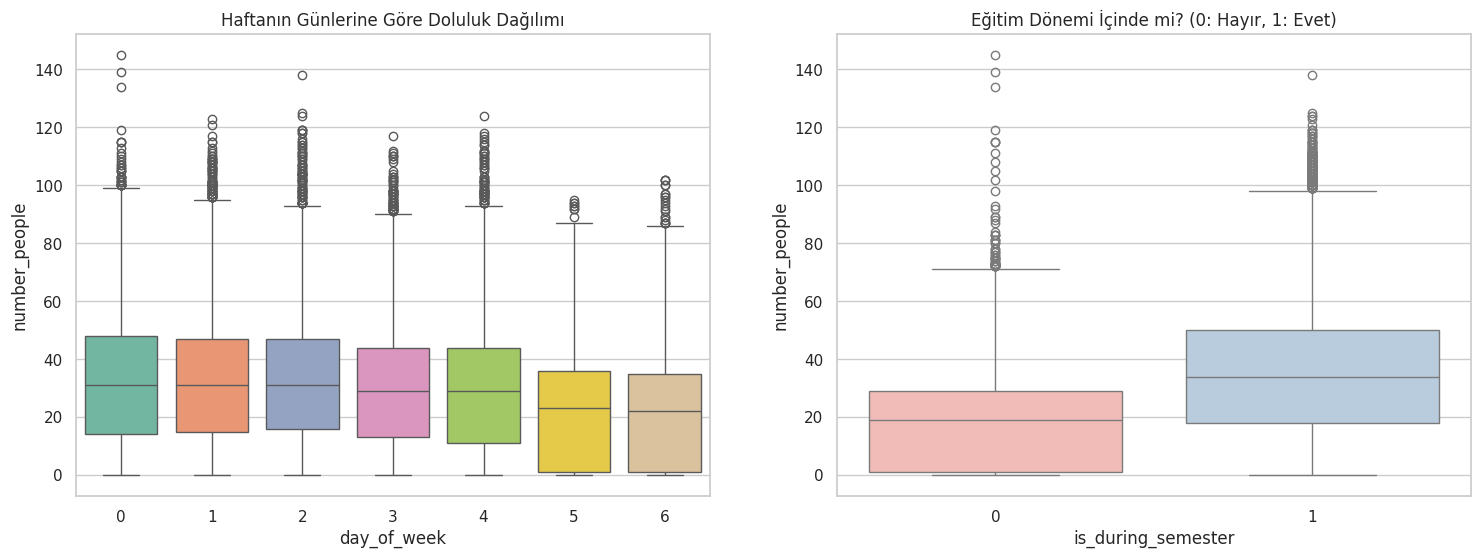

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Günlere göre dağılım (0=Pazartesi, 6=Pazar gibi varsayalım)
sns.boxplot(x='day_of_week', y='number_people', data=df, ax=ax[0], palette='Set2')
ax[0].set_title('Haftanın Günlerine Göre Doluluk Dağılımı')

# Dönem içi vs Dönem dışı (is_during_semester)
sns.boxplot(x='is_during_semester', y='number_people', data=df, ax=ax[1], palette='Pastel1')
ax[1].set_title('Eğitim Dönemi İçinde mi? (0: Hayır, 1: Evet)')

plt.show()

**5. SICAKLIK VE DOLULUK İLİŞKİSİ**

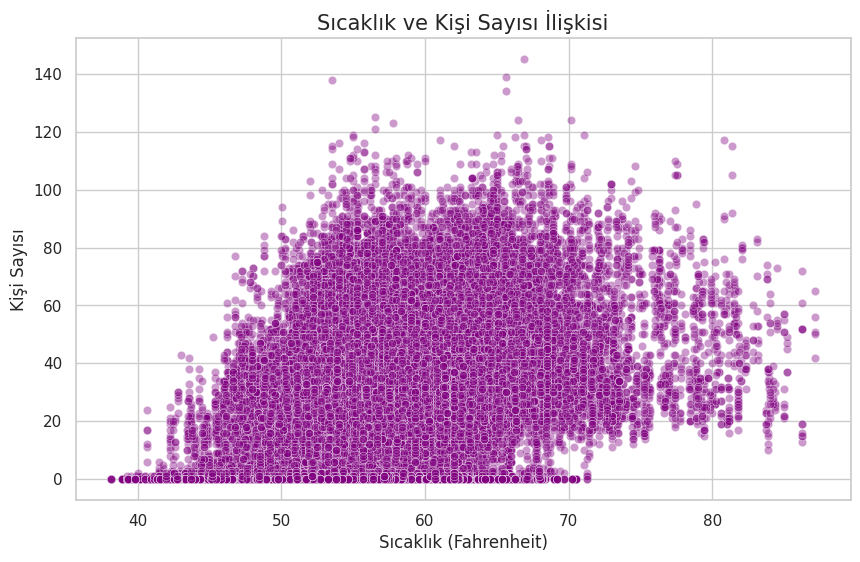

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='number_people', data=df, alpha=0.4, color='purple')


plt.title('Sıcaklık ve Kişi Sayısı İlişkisi', fontsize=15)
plt.xlabel('Sıcaklık (Fahrenheit)')
plt.ylabel('Kişi Sayısı')
plt.show()


**Yoğunluk Haritası (Heatmap - Saat vs. Gün)**

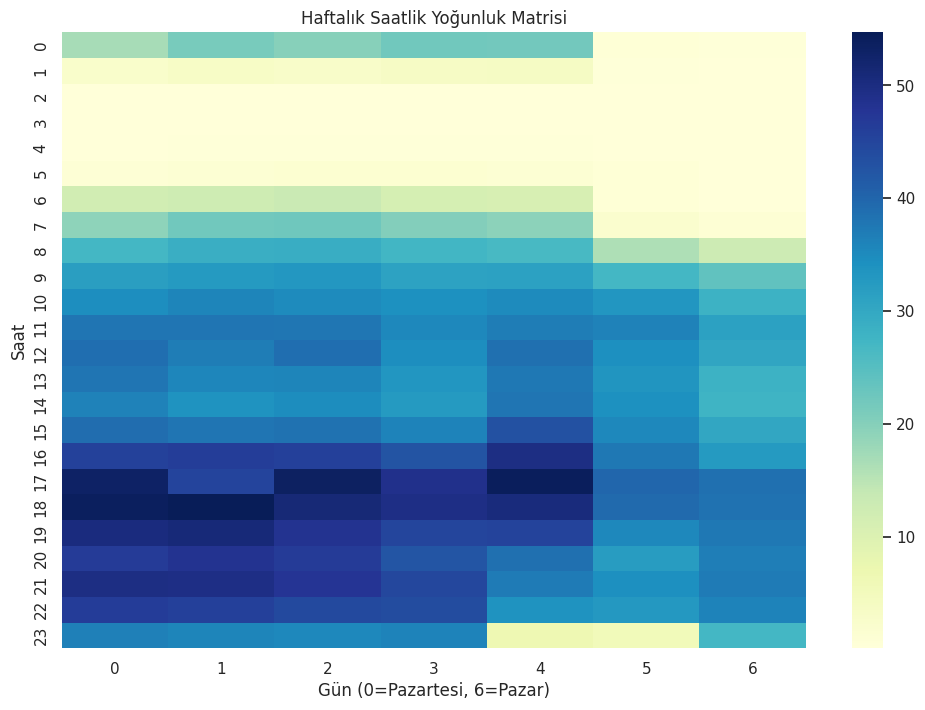

In [28]:

pivot_table = df.pivot_table(index='hour', columns='day_of_week', values='number_people', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, cmap='YlGnBu')
plt.title('Haftalık Saatlik Yoğunluk Matrisi')
plt.xlabel('Gün (0=Pazartesi, 6=Pazar)')
plt.ylabel('Saat')
plt.show()

**Akademik Dönem Etkisi (is_during_semester)**

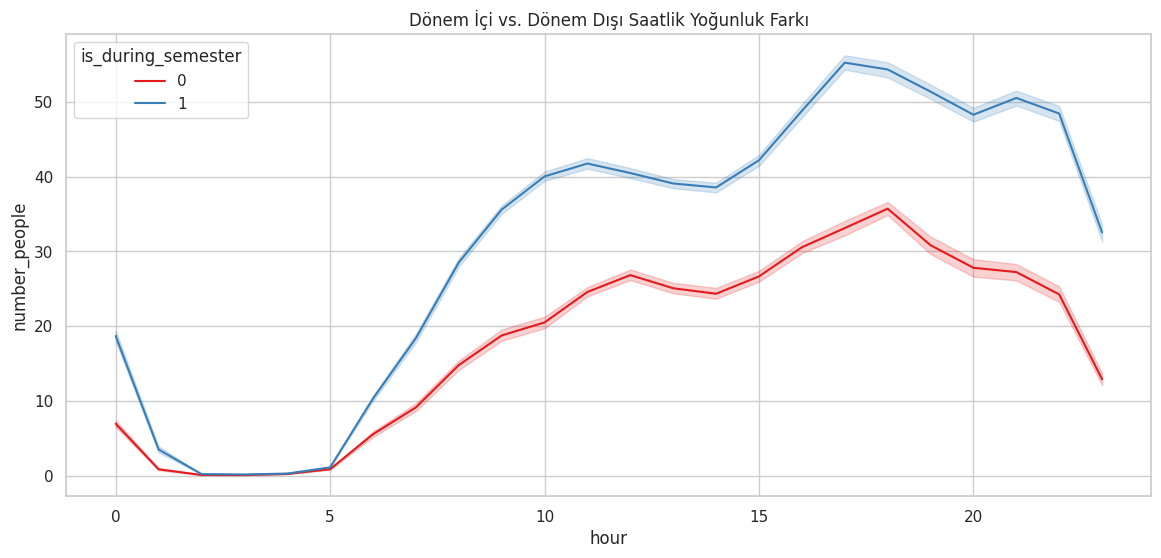

In [29]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='hour', y='number_people', hue='is_during_semester', palette='Set1')
plt.title('Dönem İçi vs. Dönem Dışı Saatlik Yoğunluk Farkı')
plt.show()

**Sıcaklık ve Kalabalık (Joint Plot)**

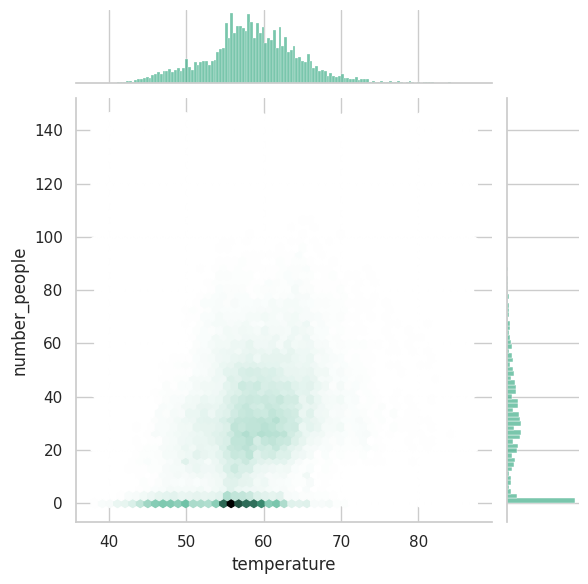

In [30]:
sns.jointplot(x='temperature', y='number_people', data=df, kind="hex", color="#4CB391")
plt.show()

**Aylık Mevsimsellik (Month vs Number of People)**

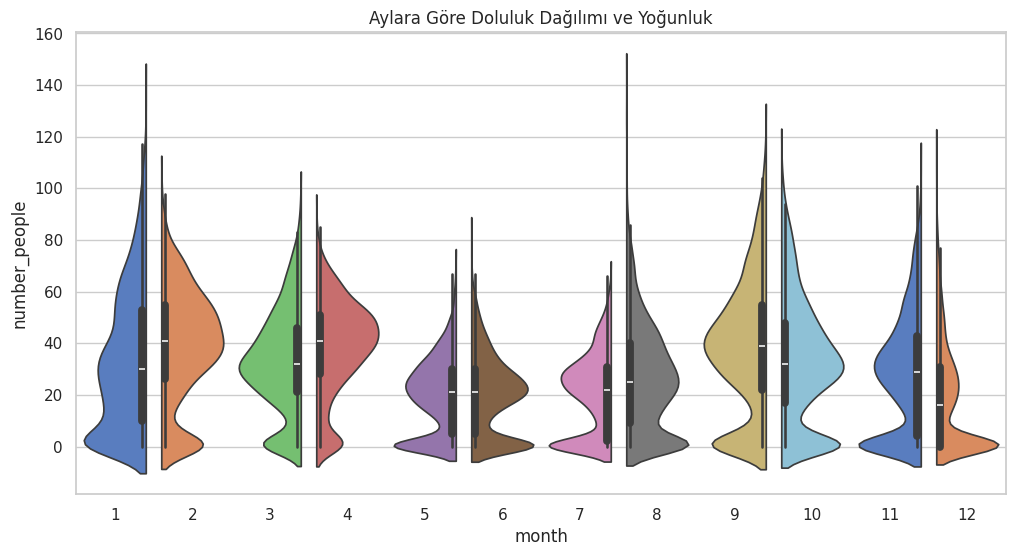

In [31]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='month', y='number_people', data=df, palette='muted', split=True)
plt.title('Aylara Göre Doluluk Dağılımı ve Yoğunluk')
plt.show()

In [32]:
df.drop("timestamp" , axis = 1 , inplace = True)

In [33]:
df.tail()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
62179,23,5,1,0,61.07,0,1,3,18,2017
62180,21,5,1,0,61.07,0,1,3,18,2017
62181,25,5,1,0,56.71,0,1,3,19,2017
62182,18,5,1,0,56.71,0,1,3,19,2017
62183,23,5,1,0,56.71,0,1,3,19,2017


# Preprocessing

**dependent & independent feature**

In [34]:
X = df.drop("number_people", axis=1)
y = df["number_people"]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42 )

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

x_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Modeling

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [40]:
def calculate_model_metrics(true , predicted):
    mae = mean_absolute_error(true , predicted)
    mse = mean_squared_error(true , predicted)
    rmse = np.sqrt(mean_squared_error(true , predicted))
    r2_square = r2_score(true , predicted)
    return mae , rmse , r2_square

In [41]:
models = {
    "Linear Regression " : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge " : Ridge(),
    "K-Neighbors Regressor " : KNeighborsRegressor(),
    "Decision Tree  " : DecisionTreeRegressor() ,
    "Random Forest Regression" : RandomForestRegressor()

}

In [42]:
for i in range (len(list(models))) :
    model = list(models.values())[i]
    model.fit(X_train , y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_train_mae , model_train_rmse , model_train_r2 = calculate_model_metrics (y_train , y_train_pred)
    model_test_mae , model_test_rmse , model_test_r2 = calculate_model_metrics(y_test , y_test_pred)
    print(list(models.values())[i])
    print("Evuation for Traning Set")
    print("RMSE : ", model_train_rmse)
    print("Mean Absolute Error : ",model_train_mae)
    print("R2 Score :" , model_train_r2)




    print("---------------------------------------")


    print("Evuation for Test Set")
    print("RMSE : " ,model_test_rmse)
    print("Mean Absolute Error : ",model_test_mae)
    print("R2 Score :" , model_test_r2)


    print("------------------------------")
    print("\n")
    

LinearRegression()
Evuation for Traning Set
RMSE :  14.388343530259105
Mean Absolute Error :  10.766412453237308
R2 Score : 0.5976993085646221
---------------------------------------
Evuation for Test Set
RMSE :  34137.28318953488
Mean Absolute Error :  34137.27550724055
R2 Score : -2261537.007649729
------------------------------


Lasso()
Evuation for Traning Set
RMSE :  14.909804868133428
Mean Absolute Error :  11.224740828301517
R2 Score : 0.5680105887337794
---------------------------------------
Evuation for Test Set
RMSE :  22258.92340720983
Mean Absolute Error :  22258.91518469432
R2 Score : -961510.0757834755
------------------------------


Ridge()
Evuation for Traning Set
RMSE :  14.388343687558322
Mean Absolute Error :  10.766398943322134
R2 Score : 0.5976992997683928
---------------------------------------
Evuation for Test Set
RMSE :  34133.57960043932
Mean Absolute Error :  34133.57192504346
R2 Score : -2261046.321082329
------------------------------


KNeighborsRegress